## 1. Checking Python environment and Working Directory 

In [1]:
import os, sys
print(os.getcwd())
print(sys.executable)

C:\Users\HP\Charles\Proyectos&Trabajos\kaggle\rofex_soja
C:\Users\HP\Anaconda3\envs\soja\python.exe


In [2]:
import warnings
warnings.filterwarnings('ignore')

## 2. Importing packages

In [3]:
import pandas as pd
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


## 3. Loading data

In [4]:
df = pd.read_csv('data/datasetRofex3.csv', date_parser=['Fecha'])

In [5]:
df.head(10)

Id                     Fecha  Open  High  Low  Last  Cierre  Aj.Dif. Mon.  \
0   1  05/01/2004 12:00:00 a.m.   0.0   0.0  0.0   0.0   221.0     13.0    D   
1   2  06/01/2004 12:00:00 a.m.   0.0   0.0  0.0   0.0   221.0      0.0    D   
2   3  07/01/2004 12:00:00 a.m.   0.0   0.0  0.0   0.0   219.0     -2.0    D   
3   4  08/01/2004 12:00:00 a.m.   0.0   0.0  0.0   0.0   220.0      1.0    D   
4   5  09/01/2004 12:00:00 a.m.   0.0   0.0  0.0   0.0   220.0      0.0    D   
5   6  12/01/2004 12:00:00 a.m.   0.0   0.0  0.0   0.0   225.0      5.0    D   
6   7  13/01/2004 12:00:00 a.m.   0.0   0.0  0.0   0.0   228.0      3.0    D   
7   8  14/01/2004 12:00:00 a.m.   0.0   0.0  0.0   0.0   228.0      0.0    D   
8   9  15/01/2004 12:00:00 a.m.   0.0   0.0  0.0   0.0   227.0     -1.0    D   
9  10  16/01/2004 12:00:00 a.m.   0.0   0.0  0.0   0.0   226.0     -1.0    D   

   OI.Vol.  OI.Dif.  Vol.Ope. Unidad  DolarB.N.  DolarItau.  Dif.Sem  
0        0        0         0   TONS      2.920       2.905   -221.0  
1        0        0         0   TONS      2.880       2.870   -221.0  
2        0        0         0   TONS      2.865       2.882   -219.0  
3        0        0         0   TONS      2.887       2.884   -220.0  
4        0        0         0   TONS      2.892       2.900   -220.0  
5        0        0         0   TONS      2.890       2.878   -225.0  
6        0        0         0   TONS      2.845       2.868   -228.0  
7        0        0         0   TONS      2.865       2.880   -228.0  
8        0        0         0   TONS      2.875       2.879   -227.0  
9        0        0         0   TONS      2.865       2.875   -226.0

In [6]:
# check column types
df.dtypes

Id              int64
Fecha          object
Open          float64
High          float64
Low           float64
Last          float64
Cierre        float64
Aj.Dif.       float64
Mon.           object
OI.Vol.         int64
OI.Dif.         int64
Vol.Ope.        int64
Unidad         object
DolarB.N.     float64
DolarItau.    float64
Dif.Sem       float64
dtype: object

In [7]:
df.columns

Index(['Id', 'Fecha', 'Open', 'High', 'Low', 'Last', 'Cierre', 'Aj.Dif.',
       'Mon.', 'OI.Vol.', 'OI.Dif.', 'Vol.Ope.', 'Unidad', 'DolarB.N.',
       'DolarItau.', 'Dif.Sem'],
      dtype='object')

In [8]:
# just keep the columns to use for the modeling
df = df[['Fecha', 'Cierre']]

In [9]:
# rename those columns
df = df.rename(columns={'Fecha': 'ds', 'Cierre': 'y'})

In [10]:
df.head(5)

ds      y
0  05/01/2004 12:00:00 a.m.  221.0
1  06/01/2004 12:00:00 a.m.  221.0
2  07/01/2004 12:00:00 a.m.  219.0
3  08/01/2004 12:00:00 a.m.  220.0
4  09/01/2004 12:00:00 a.m.  220.0

In [11]:
df.tail(5)

ds      y
3855  02/09/2019 12:00:00 a.m.  237.0
3856  03/09/2019 12:00:00 a.m.  235.0
3857  04/09/2019 12:00:00 a.m.  242.0
3858  05/09/2019 12:00:00 a.m.  242.0
3859  06/09/2019 12:00:00 a.m.  240.0

In [12]:
# check df size
df.y.size

3860

In [13]:
# some preprocessing to the data
def drop_time(row): 
    return row['ds'].split(' ')[0]
df['ds'] = df.apply(lambda row: drop_time(row), axis=1)

In [14]:
df['ds'] = pd.to_datetime(df['ds'])
df['ds'] = df[df['ds']<='2019/09/07']
df.reset_index()

index                   ds      y
0         0  2004-05-01 00:00:00  221.0
1         1  2004-06-01 00:00:00  221.0
2         2  2004-07-01 00:00:00  219.0
3         3  2004-08-01 00:00:00  220.0
4         4  2004-09-01 00:00:00  220.0
...     ...                  ...    ...
3855   3855  2019-02-09 00:00:00  237.0
3856   3856  2019-03-09 00:00:00  235.0
3857   3857  2019-04-09 00:00:00  242.0
3858   3858  2019-05-09 00:00:00  242.0
3859   3859  2019-06-09 00:00:00  240.0

[3860 rows x 3 columns]

In [15]:
# check max time value given
max(df.ds)

Timestamp('2019-09-05 00:00:00')

Months in advance?

In [16]:
# check min time value given
min(df.ds)

Timestamp('2004-01-03 00:00:00')

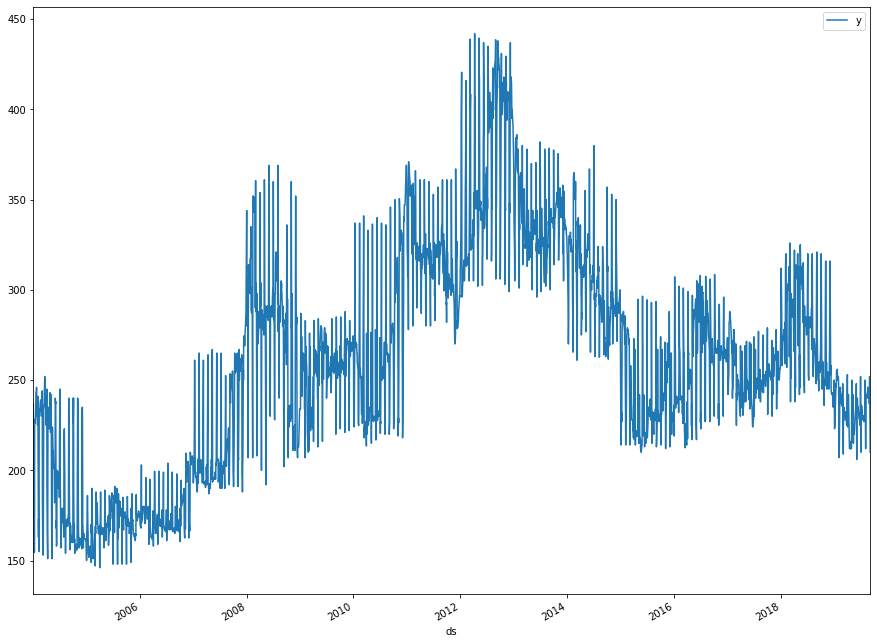

In [17]:
# plot time serie
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15, 12]
df.plot(x='ds')

In [18]:
# NaT? Where do they come from? Is the dataset wrong?
df[df['ds'].isnull()]

ds      y
3700  NaT  250.0
3701  NaT  252.0
3722  NaT  243.0
3723  NaT  247.0
3740  NaT  230.0
3741  NaT  231.0
3761  NaT  215.0
3762  NaT  215.0
3763  NaT  214.0
3780  NaT  212.0
3801  NaT  230.0
3802  NaT  230.0
3803  NaT  233.0
3819  NaT  224.0
3820  NaT  229.0
3821  NaT  232.0
3841  NaT  244.0
3842  NaT  238.0

In [19]:
# drop NaT
df.dropna(inplace=True)

## 4. Modeling

In [20]:
# instatiate Prophet model and fit it to data 
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
# make predictions
future = model.make_future_dataframe(include_history=False, periods=40)

In [22]:
future.size

40

Check that we have in df a total of 3860 rows as data input to process. Now, future dataframe has 40+ rows = 3900

## 5. Making predictions

In [23]:
forecast = model.predict(future)

In [24]:
forecast.head(5)

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2019-09-06  251.872828  219.515537  286.783745   251.872828   251.872828   
1 2019-09-07  251.864161  221.267669  287.403352   251.864161   251.864161   
2 2019-09-08  251.855495  214.603418  283.263372   251.855495   251.855495   
3 2019-09-09  251.846828  219.544048  286.486217   251.846828   251.846828   
4 2019-09-10  251.838161  214.816597  280.119533   251.838161   251.838161   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0        0.196996              0.196996              0.196996  0.250908   
1        0.429994              0.429994              0.429994  0.784196   
2       -3.511769             -3.511769             -3.511769 -2.858922   
3       -0.468170             -0.468170             -0.468170  0.473966   
4       -1.213479             -1.213479             -1.213479  0.001349   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0      0.250908      0.250908 -0.053912     -0.053912     -0.053912   
1      0.784196      0.784196 -0.354202     -0.354202     -0.354202   
2     -2.858922     -2.858922 -0.652847     -0.652847     -0.652847   
3      0.473966      0.473966 -0.942136     -0.942136     -0.942136   
4      0.001349      0.001349 -1.214828     -1.214828     -1.214828   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper        yhat  
0                         0.0  252.069824  
1                         0.0  252.294155  
2                         0.0  248.343726  
3                         0.0  251.378657  
4                         0.0  250.624682

The 20 predictions done

In [25]:
forecast.tail(5)

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
35 2019-10-11  251.569491  215.912263  282.354459   251.569491   251.569491   
36 2019-10-12  251.560824  218.626275  285.364941   251.560824   251.560824   
37 2019-10-13  251.552158  212.102700  280.027314   251.552158   251.552158   
38 2019-10-14  251.543491  217.441165  284.330944   251.543491   251.543491   
39 2019-10-15  251.534824  218.001863  283.398729   251.534824   251.534824   

    additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
35       -1.137100             -1.137100             -1.137100  0.250908   
36       -0.763953             -0.763953             -0.763953  0.784196   
37       -4.559262             -4.559262             -4.559262 -2.858922   
38       -1.364059             -1.364059             -1.364059  0.473966   
39       -1.953580             -1.953580             -1.953580  0.001349   

    weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
35      0.250908      0.250908 -1.388009     -1.388009     -1.388009   
36      0.784196      0.784196 -1.548149     -1.548149     -1.548149   
37     -2.858922     -2.858922 -1.700340     -1.700340     -1.700340   
38      0.473966      0.473966 -1.838025     -1.838025     -1.838025   
39      0.001349      0.001349 -1.954929     -1.954929     -1.954929   

    multiplicative_terms  multiplicative_terms_lower  \
35                   0.0                         0.0   
36                   0.0                         0.0   
37                   0.0                         0.0   
38                   0.0                         0.0   
39                   0.0                         0.0   

    multiplicative_terms_upper        yhat  
35                         0.0  250.432391  
36                         0.0  250.796871  
37                         0.0  246.992896  
38                         0.0  250.179432  
39                         0.0  249.581244

In [26]:
f = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [27]:
f

ds        yhat  yhat_lower  yhat_upper
0  2019-09-06  252.069824  219.515537  286.783745
1  2019-09-07  252.294155  221.267669  287.403352
2  2019-09-08  248.343726  214.603418  283.263372
3  2019-09-09  251.378657  219.544048  286.486217
4  2019-09-10  250.624682  214.816597  280.119533
5  2019-09-11  250.701476  217.455502  284.074904
6  2019-09-12  251.148046  216.251688  284.720028
7  2019-09-13  250.191148  216.724861  283.890819
8  2019-09-14  250.566075  216.877622  282.779409
9  2019-09-15  246.804294  213.833185  279.836861
10 2019-09-16  250.059390  215.460467  284.054580
11 2019-09-17  249.549768  217.722861  283.175591
12 2019-09-18  249.887208  215.681378  283.548888
13 2019-09-19  250.602490  217.425464  285.924108
14 2019-09-20  249.914062  216.611126  282.616335
15 2019-09-21  250.549077  216.097967  283.618147
16 2019-09-22  247.031271  213.411957  277.899559
17 2019-09-23  250.507135  215.270731  282.612679
18 2019-09-24  250.188827  216.537286  283.551731
19 2019-09-25  250.682902  215.232954  282.751165
20 2019-09-26  251.516096  218.138979  285.874984
21 2019-09-27  250.904095  216.526943  285.061101
22 2019-09-28  251.572657  216.026384  286.991032
23 2019-09-29  248.045512  214.754640  279.262332
24 2019-09-30  251.470534  215.998850  286.693767
25 2019-10-01  251.062589  214.248631  284.523757
26 2019-10-02  251.432185  214.995739  283.430460
27 2019-10-03  252.111114  220.009901  288.198671
28 2019-10-04  251.321069  216.953338  283.963326
29 2019-10-05  251.794567  217.386559  282.685144
30 2019-10-06  248.062640  212.279465  282.178800
31 2019-10-07  251.280772  216.826744  285.666464
32 2019-10-08  250.671512  214.872220  282.205363
33 2019-10-09  250.852882  219.953600  283.790964
34 2019-10-10  251.363784  218.919225  287.422967
35 2019-10-11  250.432391  215.912263  282.354459
36 2019-10-12  250.796871  218.626275  285.364941
37 2019-10-13  246.992896  212.102700  280.027314
38 2019-10-14  250.179432  217.441165  284.330944
39 2019-10-15  249.581244  218.001863  283.398729

In [28]:
f = f[['ds', 'yhat']]
f.to_csv('results.csv')

## 6. Final comments

This Jupyter Notebook was realized in order to participate into the Matba Rofex competition on Fundacion Sadosky about predicting soja price interday.

The link to the competition is [here](https://metadata.fundacionsadosky.org.ar/competition/11/). 

Besides, some comments from the author are given here:
1. This work is poorly compared to what other might have done; nevertheless it is the best I could accomplish with the spare time I had.
2. It is the first time I am using Prophet package, from Facebook. So any comment/suggestion is welcome.
3. This is still a WIP that could be improved in this specific points, at least:
    - Making a more deep exploratory data analysis to gain knowledge from it.
    - Making some hyperparameter tuning to the [Prophet model](https://github.com/facebook/prophet).
    - Add some more info (from other sources provided by the competition host as well as external data).
    - Any other improvement is also welcome.
    
4. All the code is hosted in this GitLab [repository](https://gitlab.com/floricar94/rofex_soja) for you to check (:
<br/>
<br/>
<br/>

This code was developed by Carlos Flury [@floricar94](https://gitlab.com/floricar94), Sep-Nov 2019.